In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd
import mplleaflet as mplf
import json

In [2]:
df = pd.read_csv("arrets-stib.csv", delimiter=';')

xmin, xmax = df.Longitude.min()-0.051, df.Longitude.max()+0.051
ymin, ymax = df.Latitude.min()-0.051, df.Latitude.max()+0.051

N = 1000
XRange, YRange = np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N)
XMat, YMat = np.meshgrid(XRange, YRange)

X, Y = map(np.ravel, [XMat, YMat])
Z = gaussian_kde([df.Longitude, df.Latitude], 0.1)([X, Y])
ZMat = Z.reshape(XMat.shape)

In [6]:
fig = plt.figure(figsize=(12, 8))
# plt.scatter(df.Longitude, df.Latitude, c='k', alpha=0.25)
plt.contourf(XRange, YRange, ZMat, 16, cmap=plt.cm.RdYlGn)
plt.contour(XRange, YRange, ZMat, 16, cmap=plt.cm.RdYlGn)
mplf.show()

<matplotlib.contour.QuadContourSet instance at 0x7fbdbddfd050>

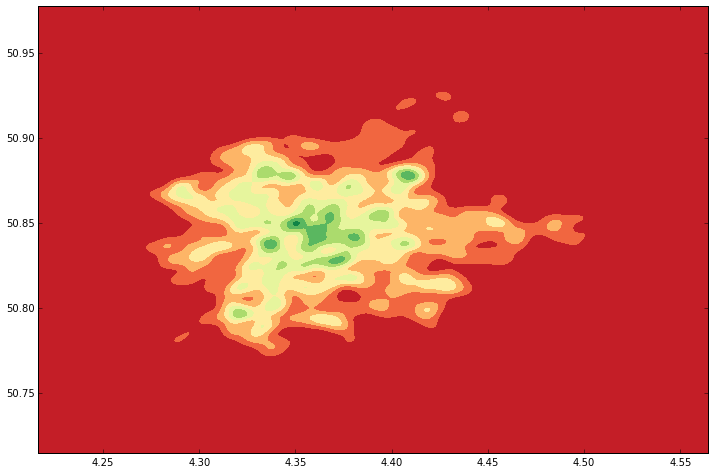

In [220]:
plt.figure(figsize=(12, 8))
plt.contourf(XRange, YRange, ZMat, cmap=plt.cm.RdYlGn)

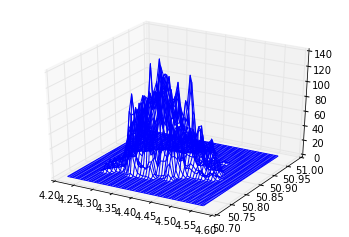

In [225]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(XMat, YMat, ZMat)